# Chapter 11   
# Parameter Estimation and Maximum Likelihood 

## Introduction   

The concept of **likelihood** and **maximum likelihood estimation (MLE)** have been at the core of much of statistical modeling for about 100 years. In the 21st Century, these ideas continue to be foundational. 

Understanding the concept of likelihood and the use of MLE methods is key to understanding many parametric statistical methods. Further, widely used machine learning models, including some deep learning models, use MLE. For example, in Chapter 22 we will investigate the algorithms for generalized linear models which rely on MLE.  

Our goal here is to find **parameter vector $\theta$ that maximize the likelihood** of a parametric model or distribution, **given the observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$**. This concept is the core of **maximum likelihood estimation**. The concept of a parametric distribution was introduced in Chapter 7.      

Stigler -@Stigler_2007 traces the long history of the concepts of likelihood and the MLE. The history starts with workers in the early 19th Century, including Gauss and Bernoulli. Major advances are marked by Fisher's seminal work in the 1920s and 1930s in establishing key properties of the MLE. Today, MLE is a workhorse of many commonly used statistical models, as well as advanced AI models employing deep neural networks.       

Unfortunately, the concepts of likelihood and maximum likelihood can appear abstract and hard to understand at first. However, the valuable understanding that a working knowledge of these topics provides for working data scientists is worth the effort. To this end, in this chapter, we focus on the following points:    

- How can we best understand and work with likelihood?     
- How can we fit models using the method of maximum likelihood estimation?   
- What are some key properties and limitations of the maximum likelihood method?  
- What algorithms can we use to perform maximum likelihood estimation, particularly at a large scale?  

## Likelihood   

Likelihood is a measure of how likely it is that a set of observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, arises from a **generating process** with a **parametric probability distribution**, $f(\mathbf{X} | \theta)$. $f(\mathbf{X}\ |\ \mathbf{\theta})$ can be either a probability density function (PDF), for continuous distributions, or a probability mass function (PMF), for discrete distributions. The distribution parameter vector, $\mathbf{\theta}$, is fixed.  

Now, for each observation, $x_i$, in $\mathbf{X} = x_1, x_2, \ldots, x_n$, the probability is just $f(x_i |\ \mathbf{\theta})$. For the set of observations, the **likelihood** is the product of these probabilities: 

$$\mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) = \prod_{i=1}^n f(x_i | \mathbf{\theta})$$

In most practical cases, we work with the **log-likelihood**. For a set of observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, the log-likelihood is expressed:    

$$l(\mathbf{X} |\ \mathbf{\theta}) = log\big( \mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) \big) = \sum_{i=1}^n log \Big( f(x_i\ |\ \mathbf{\theta}) \Big)$$   

Working with the log-likelihood means that we work with the sum of log probabilities rather than the product. If the probabilities are small, the sum is numerically stable. Whereas, the product of many small numbers is a very small number, which can lead to numerical underflow even for 64 or 128 bit floating point arithmetic.    

### Example: The Normal likelihood

The **Normal likelihood** is the product of Normal probabilities of the observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$. Using the properties of the exponential function, for $n$ observations, $\mathbf{X} = x_1, x_2, \ldots, x_n$, the likelihood is:   

$$\mathcal{L}(\mathbf{X} |\ \mathbf{\theta}) = \prod_{i=1}^n f(x\ |\ \mu,\sigma^2)  = -\frac{1}{(2 \pi \sigma^2)^{n/2}} exp\Big[ - \frac{1}{2 \sigma^2}  \sum_{i=1}^n(x_i - \mu)^2 \Big]$$

The log-likelihood can then be written:  

$$l(\mathbf{X}\ |\ \mu, \sigma ) = - \frac{n}{2} log( 2 \pi \sigma^2 ) - \frac{1}{2 \sigma^2} \sum_{j=1}^n (x_j - \mu)^2$$

It is clear that the log-likelihood is a function of the parameter vector, $\theta = [\mu,\sigma]$. Notice also that as the number of observations increases so does the likelihood.   

To continue executing the code in the cell below to import the required packages.  

In [1]:
## Imports
import matplotlib.pyplot as plt
from scipy.stats import norm, binom
import numpy as np
import numpy.random as nr
import pandas as pd
import seaborn as sns
from math import sqrt
%matplotlib inline

An example will help illustrate the foregoing concepts. The code below plots the likelihood for 5, 10, and 20 samples from a **standard Normal distribution**. A standard Normal distribution has parameter vector $\theta = [\mu,\sigma] = [1, 0]$. In this example, we vary the parameter $\mu$, and assume the parameter $\sigma$ is fixed to 1.0. The steps are:     
- A random sample is drawn from a standard Normal distribution.    
- For the random sample the log-likelihood is computed at each location parameter value. In code, we do this by summing the logarithm of the PDFs for each observation at a value of the parameter $\mu$. The lambda (anonymous  function) specified the log of the PDF using the [scipy.stats.norm.logpdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) function.      
- The log-likelihood is plotted for each of the location parameter values.    


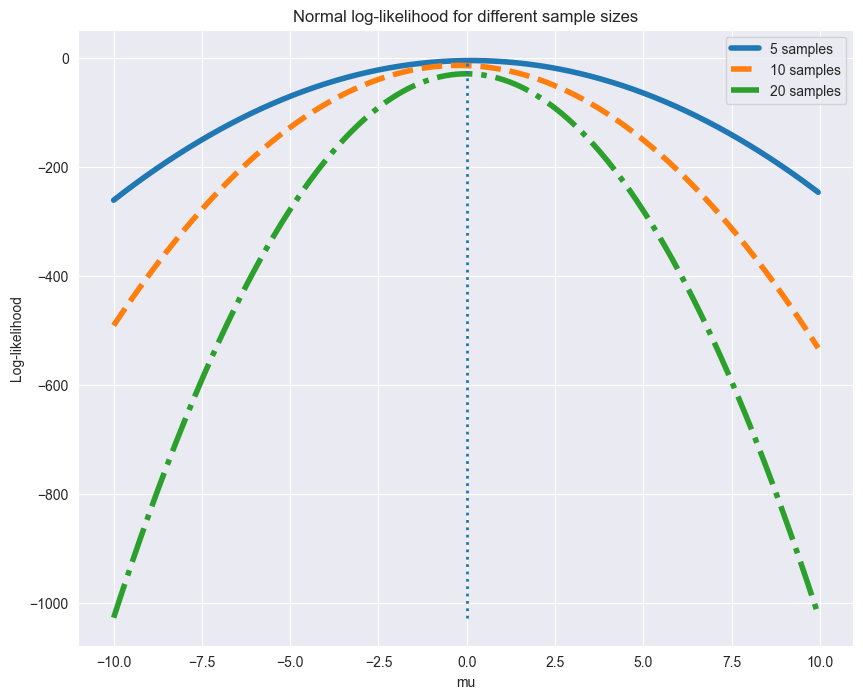

In [2]:
def plot_likelihood_1(sample_dist, pdf, num_samples, start, stop, linestyle, xlabel = 'x', max_point=0.0, title = '', figsize=(10,8)):
    ## Setup for plot
    fig, ax = plt.subplots(figsize=figsize) 
    X = np.arange(start, stop, step=0.05)

    ## Loop over the number of samples
    for i,samps in enumerate(num_samples): 
        ## Compute a sample from standard Normal
        sample = sample_dist(samps)
        ## Iterate over the x values and compute the likelihood
        y=[pdf(sample, mu).sum() for mu in X]
        ## Plot the likelihood    
        _=ax.plot(X, y, linewidth=4, label= str(samps) + ' samples', linestyle=linestyle[i])

    ## Add annotations to plot
    ax.vlines(max_point, ymin=min(y), ymax=0.0, linewidth=2, linestyles='dotted')
    ax.set_ylabel('Log-likelihood')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    ax.legend()
    plt.show()         


sample_dist = lambda x: nr.normal(size=x)
pdf = lambda x, y: norm.logpdf(x, loc=y)
num_samples = [5, 10, 20]
start = -10.0
stop = 10.0
linestyle = ['solid','dashed','dashdot']
plot_likelihood_1(sample_dist, pdf, num_samples, start, stop, linestyle, xlabel='mu', title='Normal log-likelihood for different sample sizes')


Notice the following expected properties:    
- The maximum of the likelihood is near the actual location parameter value the samples were drawn from, $\mu=1$.     
- As the number of samples increases the curvature of the log-likelihood increases and the width decreases. The width of these curves is a measure of the uncertainty of the parameter estimate. This behavior indicates that the dispersion of the MLE estimate of the $u$ decreases with increasing sample size. In other words, the **uncertainty in maximum likelihood estimates decreases as sample size increases**.       

> **Exercise 11-1:** With the foregoing theory and example in mind, it is time to work with a more realistic example. One might consider modeling the price per square foot of housing using the parametric log-Normal density function. The univariate log-Normal density function has two parameters, $(\mu,\sigma)$. Complete the code in the `likelihood_grid` function to compute the likelihood in a 2-dimensional array by the following steps:       
> 1. Create a 2-dimensional Numpy array of 0s of dimensions (number of sigma values, number of mu values). You can use the [numpy.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html). function to do so.    
> 2. Iterate over all pairs of mu and sigma values in the grid with `np.ndindex(param_grid[0].shape).` For each parameter vector, compute the likelihood using [scipy.stats.norm.logpdf](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html) and fill in the element of the Numpy array.  
> Execute the code and examine the resulting plot.   

Check for 247082 rows with shape = (247082, 8)
Empirical estimates of sample: mu = 4.468603907197355   sigma = 0.3825497727012868
shape of mu_values = (40,)
shape of sigma_values = (15,)
shape of likelihood = (15, 40)


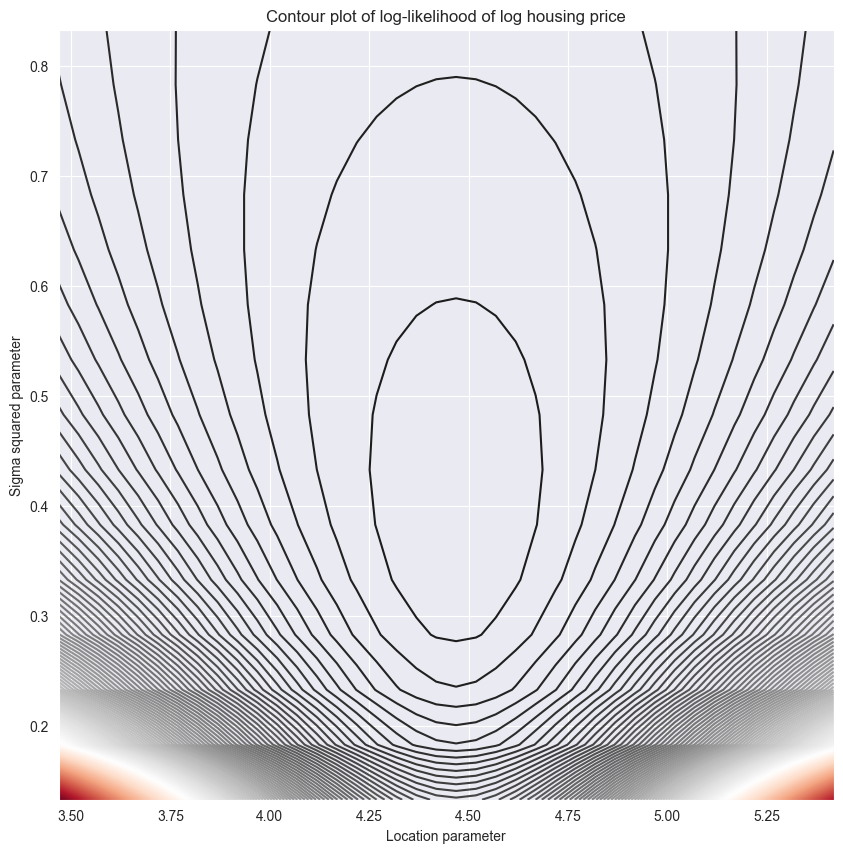

In [27]:
housing = pd.read_csv('..//data//housing.csv')
print(f"Check for 247082 rows with shape = {housing.shape}")

## Remove null values and compute log of medium price for square foot
housing = housing[housing.loc[:,'medListPriceSqft'].notnull()]
housing.loc[:,'log_medListPriceSqft'] = np.log(housing.loc[:,'medListPriceSqft'])

## Random sample the log median list price 
size = 100
np.random.seed(10101)
log_housing_price_100 = np.random.choice(housing.loc[:,'log_medListPriceSqft'], size=size, replace=False)
mu = np.mean(log_housing_price_100)
sigma = sqrt(np.var(log_housing_price_100))
print(f"Empirical estimates of sample: mu = {mu}   sigma = {sigma}")

def likelihood_grid(x, mu_range=(mu - 2.0, mu + 2.0), sigma_range=(sigma/2, 2*sigma)): 
    ## Compute vectors of mu and sigma values and use these to create a grid   
    mu_values = np.arange(mu_range[0], mu_range[1], step=0.05)
    sigma_values = np.arange(sigma_range[0], sigma_range[1], step = 0.05)
    param_grid = np.meshgrid(mu_values, sigma_values)
    
    ## Add your code below to fill in the grid or 
    ## Numpy array with likelihood values. Name the array of dimension
    ## (# mu values, # sigma values) likelihood. 
    likelihood = np.zeros((len(sigma_values), len(mu_values) ))
    for mu,sigma in np.ndindex(param_grid[0].shape):
        likelihood[mu,sigma] = norm.logpdf(x,
                                           param_grid[0][mu,sigma],
                                           scale = param_grid[1][mu,sigma]).sum()
    return likelihood, mu_values, sigma_values   

def plot_Normal_likelihood(x, mu_range=(mu - 1.0, mu + 1.0), sigma_range=(sigma - 0.25, sigma + 0.5), levels=200):
    likelihood, mu_values, sigma_values = likelihood_grid(x, mu_range=mu_range, sigma_range=sigma_range)
    fig, ax = plt.subplots(figsize=(10, 10))
    print('shape of mu_values = '+str(mu_values.shape))
    
    print('shape of sigma_values = '+str(sigma_values.shape))
    print('shape of likelihood = '+str(likelihood.shape))
    ax.contour(mu_values, sigma_values, likelihood, levels=levels, cmap='RdGy')
    ax.set_title('Contour plot of log-likelihood of log housing price')
    ax.set_ylabel('Sigma squared parameter')
    ax.set_xlabel('Location parameter')

plot_Normal_likelihood(log_housing_price_100)

> Examine the contour plot. Notice that there is a clear maximum with log-likelihood decreasing away from this maximum. Answer the following questions:      
> 1. Which parameter values are approximately the maximum of the log-likelihood?     
> 2. For which parameter is the log-likelihood not symmetric about the maximum? 
> 3. How does this asymmetric gradient limit the accuracy of the parameter estimation?  

> **Answers:**      
> 1. The mean is close to the estimate whereas the maximum likelihood for sigma is must different from the value based on the variance estimate.    
> 2. The contours are not symmetric for sigma. The gradient is high for small values since there is a constraint that $\sigma>0$,          
> 3. The gradient is rather flat for sigma around the maximum likelihood point, particularly as the value of $\sigma$ increases beyond the maximum log-likelihood point. This low gradient of slope limits the accuracy of the estimate.     

### Example: Binomial Likelihood   

In the foregoing example, we investigated the log-likelihood of the Normal distribution. Now, we will explore a different example of log-likelihood for the Binomial distribution. Some differences include:   
- The Binomial distribution models **discrete events**. The Normal distribution is for continuous-valued observations.    
- The range of the single parameter, $\pi$, of the Binomial distribution is restricted to the range $0 \le \pi \le 1$. At least in principle, the range of the location parameter, $\mu$, of the Normal distribution is in the range $-\infty \le \mu \le \infty$, with the scale parameter limited to the range $0 < \mu \le \infty$.    

Recall that the Binomial distribution has the following probability mass function (PMF) for $k$ successes in $n$ trials:        

$$
f(k, n\ |\ \pi) = \binom{n}{y} \pi^k (1 - \pi)^{n-k}
$$
$$
0 \le \pi \le 1
$$
$$
0 \le k \le n
$$

Given this PDF, the log-likelihood is easily found:    

$$l(k, n | \pi) = log \binom{n}{k} + k\ log(\pi) + (n-k)\ log(1-\pi)$$

You can see that the Binomial log-likelihood has a strong dependence on both the sample size, $n$ and the number of successes, $k$.    

> **Exercise 11-2:** Consider how one might use the concept of likelihood to determine if a fair coin is being used in a toss. Let 'heads' be a success. The question is, how likely are the observed results to be from a fair coin for different sample sizes? Perform the following steps:    
> 1. Define `num_samples = [25, 50, 100]`.
> 2. Assign an anonymous function to the name `sample_dist`, which simulates tosses of a fair coin $(\pi = 0.5)$ with random draws from a Binomial distribution using [numpy.random.binomial](https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html) with $n=1$.      
> 3. Define a function named `pmf`which uses arguments of the values of the observations, $x$, and the probability parameter, $p$ and returns the log-binomial likelihood using the [scipy.stats.binom.logpmf](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html) function. 
> 4. Execute the code and examine the result.   

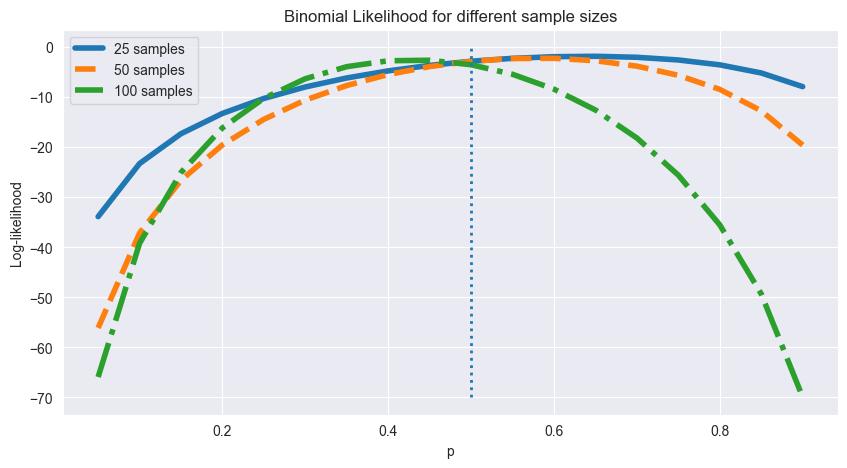

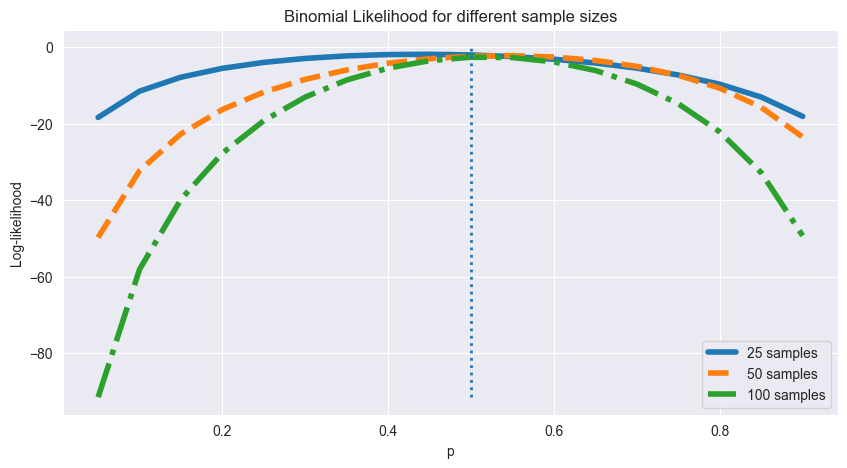

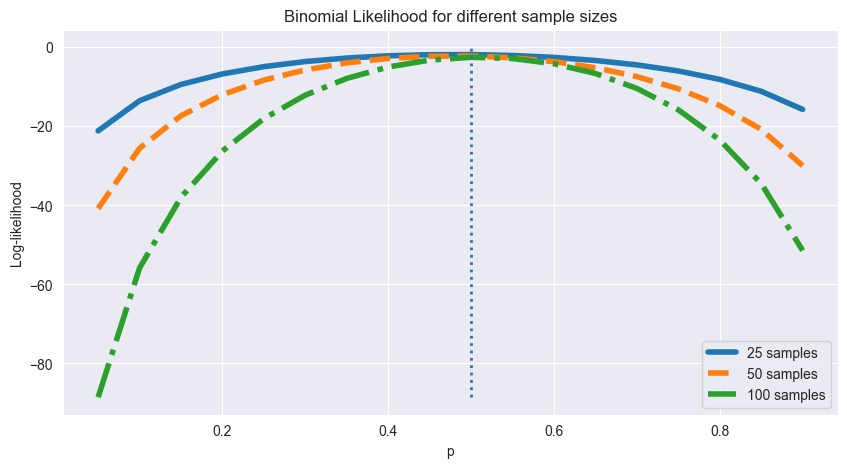

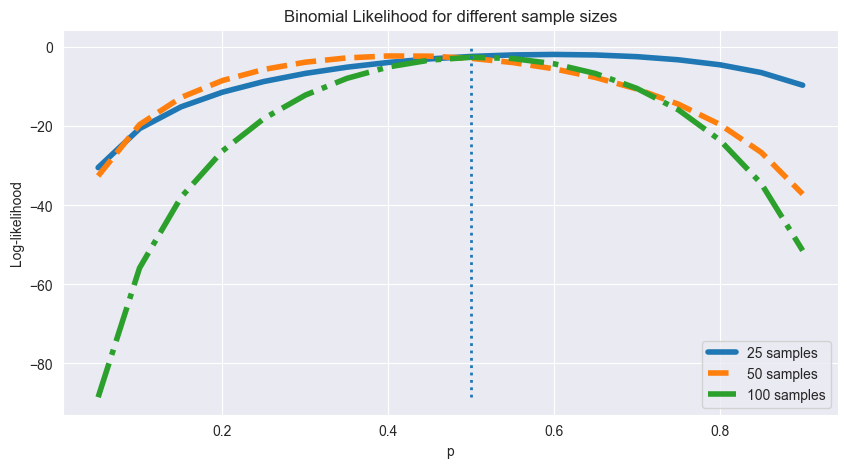

In [34]:
p=0.5
np.random.seed(4687)

## Your code goes below       
num_samples = [25, 50 , 100]

sample_dist = lambda x: nr.binomial(n=1, size=x, p=p)

def pmf(x, p):
    return binom.logpmf(np.sum(x), n=len(x), p=p)



start = 0.05
stop = 0.95
linestyle = ['solid','dashed','dashdot']
for _ in range(4):
    plot_likelihood_1(sample_dist, pmf, num_samples, start, stop, linestyle, xlabel='p', max_point=p, title='Binomial Likelihood for different sample sizes', figsize=(10,5))

> Answer the following questions:    
> 1. How does the shape of the likelihood curve change with sample size? 
> 2. How does the shape of the likelihood curves change with the random draw for each sample size?    
> 3. Are the maximums of the likelihood curves near the expected value of 0.5?  
> 4. Based on your above answers, what can you say about the confidence you should have in determining if a coin is fair for these different sample sizes?    

> **Answers:**    
> 1. The curvature (gradient) of the likelihood increases as the number of samples increases.      
> 2. For the 25 and 50 sample curves change the slope (gradient) with each random draw of the samples, whereas, for the 100 sample curve the variation is less.     
> 3. For the 100-sample curve, the maximum likelihood is close to the theoretical value, whereas there is considerable variation for the 25 and 50-sample curves.    
> 4. The confidence in the parameter estimate for 100 observations will have low variation, whereas for the 25 and 50 sample curves there will be considerable variation.   

## The Maximum Likelihood Estimator    

As has already been stated, the maximum likelihood estimator (MLE) is a foundational tool for much of statistical inference and machine learning. The concept is attractive and intuitive. Given a log-likelihood function, find the model parameters which maximize it. Further, knowing the distribution allows us to quantify the uncertainty of the MLE parameter estimates. As we will see shortly, the distribution of the model parameter estimates found by MLE is Normal for large samples for any parametric, a remarkable property. 

We will only give an overview of the essential elements of the theory. Many standard statistics and machine learning texts contain much greater detail. For example, Chapter 7 of Freedman -@Freedman_2009 provides an overview of MLE theory along with many specific examples. Section 4.4 of Davidson -@Davidson_2008 provides a rigorous derivation of significant properties of the MLE.    

The MLE is a **point estimator**. The solution is an estimate of a single parameter value, or point value, with the highest likelihood. We will explore measures of uncertainty for point estimates in the next section of this book.     

The maximum likelihood for the model parameters is achieved when two conditions are met:  

$$
\frac{\partial\ l(\mathbf{X}\ |\ \mathbf{\theta)})}{\partial \theta} = 0 \\
\frac{\partial^2\ l(\mathbf{X}\ |\ \mathbf{\theta)})}{\partial \theta^2} < 0
$$


You can interpret these two conditions as follows:    
- The first derivative of the log-likelihood function, or slope, will be 0 at either maximum or minimum points. In general, $\vec{\theta}$ is a vector of model parameters, and the partial derivatives of log-likelihood are a vector; the gradient of the log likelihood with respect to the model parameters. These first derivatives or gradient of the log-likelihood are known as the **score function**.        
- The second derivative of the log-likelihood indicates the curvature. A maximum has negative curvature, whereas, a minimum has positive curvature.   

### Fisher information and properties of MLE     

The maximum likelihood estimator has some useful and desirable properties. These properties form a basis for understanding MLE methods. To understand these concepts we will outline the derivation of some key properties. Additional details can be found in many references, including Effron and Hastie -@Efron_Hastie_2016 Section 4.2 or Davidson -@Davidson_2008 Section 4.4.   

We start with a matrix of second partial derivatives of the log-likelihood function. For a multi-parameter model, the second derivatives of the log-likelihood function form a matrix. The elements of the matrix include all second partial derivatives with respect to each model parameter. This matrix is known as the **observed information matrix** of the model, $\mathcal{I}(\vec{\theta})$.   


$$
\mathcal{I}(\vec{\theta}) = 
\begin{pmatrix}
  \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_1^2} & 
  \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_2\ \partial \theta_1} & 
  \cdots & 
  \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n\ \partial \theta_1}\\
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_1\ \partial \theta_2} &
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_2^2} & 
   \cdots &
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_2\ \partial \theta_n}\\
   \vdots & \vdots & \vdots & \vdots \\
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n\ \partial \theta_1} &
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n\ \partial \theta_2} & 
   \cdots &
   \frac{\partial^2 l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n^2} 
 \end{pmatrix}
$$

The observed information matrix has some useful properties:    
- The more negative the values of the second partial derivatives, the greater the curvature of the log-likelihood. This means that the log-likelihood function has a narrower range. The narrow peak implies that the information on the parameter value for the model is high.  
- The above implies that MLE estimates with higher information values have less uncertainty.   
- The matrix is symmetric, so the information is symmetric around the maximum likelihood point.    

**Expected or Fisher Information**    

For computing the observed information matrix is useful if you have observations. But, how can one consider the information of the MLE before sampling data or performing an experiment? The answer is to use the **expected information** or **Fisher information**. Fisher information is computed by taking the expectation over the second derivative of the log-likelihood, or the observed information:        

$$\mathcal{J}(\vec{\theta}) = -\mathbf{E}\big\{ \mathcal{I}(\vec{\theta}) \big\} = -\mathbf{E}\big\{ \frac{\partial^2\ l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta^2} \big\}$$


The Fisher information leads to an important relationship, that the MLE parameter estimate $\hat{\theta}$ is a Normally distributed random variable. To see this we start with a Taylor expansion of the maximum likelihood estimator:   

$$
0 = \frac{\partial\ l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta} = 
\frac{\partial\ l(\theta)_\mathbf{X}}{\partial \theta} + 
\frac{\partial^2\ l(\hat{\theta})_\mathbf{X}}{\partial \theta^2} (\hat{\theta} - \theta)
$$
or   
$$
0 = l'(\theta)_\mathbf{X} + l''(\hat{\theta} - \theta)_\mathbf{X}
$$
Where, $l'(\theta)_\mathbf{X}$ symbolizes the first partial derivative evaluated at $\mathbf{X}$ and $l''(\hat{\theta})_\mathbf{X}$ symbolizes the second partial derivative evaluated at $\mathbf{X}$. Continuing with the simplified notation, and solving for $\hat{\theta}$;    

$$
\hat{\theta} = \theta + \frac{l'(\theta)_\mathbf{X}/n}{-l''(\hat{\theta})_\mathbf{X}/n}
$$

Now the Fisher information is related to the **score function** as its variance:   

$$
\frac{\partial\ l(\theta)}{ \partial \theta}\ \dot{\sim}\
\mathcal{N} \big(0, 1/ \mathcal{I}_\theta \big)
$$

**Convergence to Normal Error Distribution**   

For a **large sample**, $n \rightarrow \infty$, we can take the expectation of the above relation over $\mathbf{X}$. Assuming the first and second derivatives of the log-likelihood function exist and are continuous, and applying the Central Limit Theorem we arrive at a remarkable result:    

$$\hat{\theta} \dot{\sim} \mathcal{N}\Big(\theta, \frac{1}{n\mathcal{I}(\theta)} \Big)$$

This relationship leads us to several important properties of the MLE:   
- The maximum likelihood estimate of the model parameters, $\hat{\theta}$, is **Normally distributed**.      
- The **larger the Fisher information, the lower the variance of the parameter estimate**. This observation is consistent with the idea that greater curvature of the log likelihood function the more certain the parameter estimate.    
- The **variance of the parameter estimate is inversely proportional to the number of samples, $n$**.   

These concepts will play a key role in our analysis of confidence intervals in the next section of this book.     

### Example of MLE for Normal distribution   

To help make the foregoing more concrete, we will work out the maximum likelihood estimator for the Normal distribution. As a first step, we work out the derivatives of the log-likelihood function with respect to the model parameters, $\mu$ and $\sigma2$. The first derivatives are:   
$$
\begin{pmatrix}
\frac{\partial l}{\partial \mu} \\
\frac{\partial l}{\partial \sigma^2}
\end{pmatrix}
=
\begin{pmatrix}
\frac{1}{\sigma^2} \sum_j (x_j - \mu) \\
-\frac{n}{2 \sigma^2} + 
\frac{1}{2 \sigma^4} \sum_j (x_j - \mu)^2
\end{pmatrix}
=
\begin{pmatrix}
0 \\ 0
\end{pmatrix}
$$

Starting with the above, it is easy to find the well-known formula to compute the maximum likelihood estimate of $\mu$. This estimate is the mean, $\bar{x}$. The steps to verify this relationship are:   

\begin{align}
&\sum_{j=1}n (x_j - \mu) = 0\\ 
\bar{x} &\rightarrow \mu:\ at\ convergence\\
\bar{x} &= \frac{1}{n} \sum_{j=1} x_j
\end{align}

Finding the maximum likelihood estimate of $\sigma^2$ is straightforward as well. We use the notation $s^2$ to represent the MLE of $\sigma^2$. The familiar relationship to estimate the variance is found as follows:   

\begin{align}
\frac{1}{s^2} &\sum_{j=1} (x_j - \mu)^2 = n \\
\bar{x} &\rightarrow \mu:\ at\ convergence\\
s^2 &= \frac{1}{n} \sum_{j=1}^n (x_j - \bar{y})^2 
\end{align}




$$
\mathcal{J}(\vec{\theta}) = - \mathbf{E}
\begin{pmatrix}
\frac{\partial^2 l}{\partial \mu^2} & \frac{\partial^2 l}{\partial \mu\ \partial \sigma^2}\\
\frac{\partial^2 l}{\partial \mu\ \partial \sigma^2} & \frac{\partial^2 l}{\partial (\sigma^2)^2}
\end{pmatrix} 
= - \mathbf{E}
\begin{pmatrix}
-\frac{n}{\sigma^2} & -\frac{n}{\sigma^4}(\bar{x} - \mu) \\
-\frac{n}{\sigma^4}(\bar{x} - \mu) & -\frac{n}{2\sigma^4} + \frac{1}{\sigma^6} \sum_j (x_j - \mu)^2
\end{pmatrix}
= 
\begin{pmatrix}
\frac{n}{\sigma^2} & 0 \\
0 & \frac{n}{2\sigma^4} 
\end{pmatrix}
$$

The simplification results from the fact that $\bar{x} \rightarrow  \mathbf{E}(\mathbf{x_j})  = \mu$ and $s^2 \rightarrow \mathbf{E} \big\{ (x_j - \mu)^2 \big\} = \sigma^2$ in the limit of a large sample from the law of large numbers. 

There are some aspects of these relationships which make the MLE method attractive:     
- The curvature of the MLE for both parameters increases with the number of samples $n$. In other words, the **peak of the log-likelihood function becomes better defined as $n$ increases**.     
- The **maximum likelihood estimates of the parameters, $\mu$ and $\sigma^2$ are independent**. The off-diagonal terms are $0$.   
- The result is that the error for the estimate of $\bar{x}$ is just $\frac{n}{\sigma^2}$ and the error for the estimate of scale, $\sigma^2$, is just $\frac{n}{2\sigma^4}$.  

> **Exercise 11-3:** The observed information matrix provides a measure of the log-likelihood curvature at the estimated parameter values. In a previous exercise you plotted the log-likelihood for the approximately log-Normally distributed housing price data. Create a plot the Fisher information for the two parameters of the univariate Normal distribution. To create this plot, do the following:     
> 1. Use random Bernoulli samples of size, 10, 20, 50 and 100, from the log housing price values. To do so, you will need an estimate of $\sigma^2$ for the population.    
> 2. Use a python lambda (anonymous function) in a call to [numpy.apply_along_axis](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html) to compute the Fisher information for each parameter and sample Numpy functions. Use the formulation given above. To create consistent values of Fisher Information for each of the parameters, you must use an estimated value for the other parameter, $\sigma^2$. Use the empirical estimate of the variance, $s^2$, computed from the complete sample of median log housing prices computed with the [numpy.var](https://numpy.org/doc/stable/reference/generated/numpy.var.html) function.    
> 3. Plot the Fisher information for both parameters on the vertical axis against sample size on the horizontal axis. Be sure to follow proper chart practice to ensure these curves are distinguishable, and the charts are properly labled.
> 4. Execute your code and examine the plot. 

sigma_2 = 0.1610373530683672


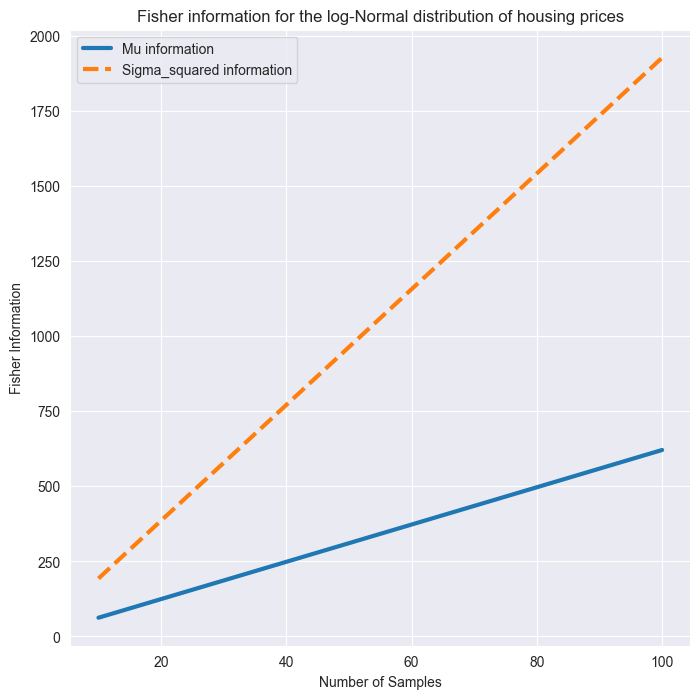

In [36]:
## Put your code below
sigma_2 = np.var(housing.loc[:,'log_medListPriceSqft'])
print('sigma_2 = '+str(sigma_2))

num_samples = [10, 20, 50, 100]
mu_information = np.apply_along_axis(lambda x: x/sigma_2, 0, num_samples)
sigma_information = np.apply_along_axis(lambda x: x/(2 * sigma_2**2), 0, num_samples)


## Make the plots
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(num_samples, mu_information, label='Mu information', lw=3);
ax.plot(num_samples, sigma_information, label='Sigma_squared information', lw=3, linestyle='dashed');
ax.legend();
ax.set_title('Fisher information for the log-Normal distribution of housing prices');
ax.set_ylabel('Fisher Information');
ax.set_xlabel('Number of Samples');

> Examine these plots and answer the following questions:   
> 1. Do the values of Fisher information for both parameters change in a similar way? If not, what does this tell you about your ability to estimate these parameters?    
> 2. Is the change in Fisher information consistent with the curvature of the likelihood functions plotted in the previous exercise?      
> 3. How might consideration of Fisher's information help you construct a sampling plan? 

> **Answers:**   
> 1. The Fisher information for both parameters increases linearly with a number of samples, with the FI for $\sigma$ decreasing faster.     
> 2. Yes, the previous exercise showed that $\sigma$ had a lower gradient with increasing value, consistent with lower FI.    
> 3. It is clear that larger samples are needed to achieve a lower variance estimate of $\sigma$.  

### Example; Binomial distribution

As another example of likelihood estimation, we turn our attention to the Binomial distribution. This distribution is discrete and has a single parameter. We start with the derivative of the log-likelihood function:    

$$
\frac{\partial\ l(n, k | \pi)}{\partial \theta} = \frac{k}{n} -\frac{n-k}{1-\pi} = 0 
$$

The solution to the above has a simple closed form:  

$$\pi = \frac{k}{n}$$

The information for the maximum likelihood estimator is found by taking the second derivative of the log-likelihood function:   

$$
\frac{\partial^2 l(n, k | \pi)}{\partial \theta^2} = -\frac{k}{\pi^2} - \frac{n-k}{1-\pi^2} = -\frac{n}{\pi(1-\pi)}
$$

Then we can write:  

$$\mathcal{J}(\vec{\theta}) = - \mathbf{E} \Bigg[ \frac{\partial^2 l(n, k | \pi)}{\partial \theta^2}\Bigg] = \frac{-n}{\pi(1-\pi)}$$

You can see that the curvature increases with the number of samples $n$. Further, there is a dependency on $\pi$. As $\pi \rightarrow 0$ or $\pi \rightarrow 1$ the log-likelihood becomes negative extremely rapidly. 

> **Exercise 11-4:** For a fixed sample size of 100, plot the information of the binomial maximum likelihood estimator. Make the range of the  parameter, $0.01 \le \pi \le 0.99$ in steps of $0.01$. Examine your plot and answer these questions:     

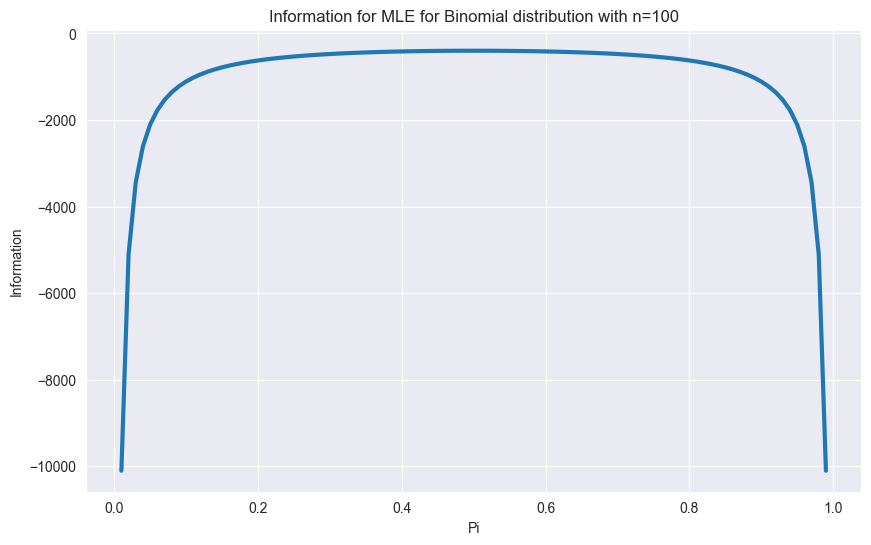

In [44]:
## Put your code below   
pi = np.arange(0.01, 1.0, step=0.01)
num_samples = 100.0

binom_information = np.apply_along_axis(lambda x: -1.0*num_samples/(x*(1.0-x)), 0, pi)

## Now make the plot
fig, ax = plt.subplots(figsize=(10, 6), ) 
_=ax.plot(pi, binom_information, lw=3);
ax.set_title('Information for MLE for Binomial distribution with n=100');
ax.set_ylabel('Information');
ax.set_xlabel('Pi');

> Answer the following questions:   
> 1. Given the curvature around the middle parameter value, how much confidence can you have in the maximum likelihood parameter estimate?     
> 2. How would you describe the change in information at the limits of the range of $\pi$ plotted? How do you think this behavior would impede estimates of a parameter close to these limits?  

> **Answers:**      
 1. The information is lowest at $\pi = 0.5$ with reasonable curvature, indicating the estimate of the parameter value will have reasonably low variance.      
> 2. There is low curvature at the limits of the parameter, $\pi$, indicating that parameter estimates at these limits will have relatively high variance. Further, as $pi \rightarrow 0$ or $pi \rightarrow 1$ the information blows up to infinity, which is problematic.  

## Finding Solutions Without a Closed Form

So far in this discussion, we have only explored cases where the maximum likelihood solution is a closed form. In the foregoing examples, simple algebra produced solutions. In general, this will not be the case. A common example, is logistic regression, which has no closed form maximum likelihood solution exists.   

When no closed-form solution is available an approximate solution can be found by numerical **optimization methods** or **root finding methods**. Here, we will briefly examine two such methods, gradient descent and Newton's method. These methods are similar, but differ in important detail. We will only present an outline here. Many texts give full details of a number of different numerical methods for finding a maximum of a function.  

For the example of logistic regression, you can find many details on MLE methods in some machine learning and statistics texts. Section 4.4 of Hastie, Tibshirani, and Freedmen -@Hastie_etal_2009, or Section 8.3 of Murphy -@Murphy_2012 provide overviews.   

### Gradient descent methods

The gradient descent method has an intuitive explanation. The maximum of the log-likelihood function can be found by following the **gradient of the log-likelihood function** until a maximum is reached. 

To formulate this algorithm, we start with the gradient of the log-likelihood function with respect to the parameters, $\theta$. The gradient is the vector of partial derivatives with respect to each of the dimensions of the parameter vector.   

$$
grad(l(\vec{\theta})) =  \nabla_\theta\ l(\vec{\theta}) = \begin{pmatrix}
  \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_1} \\
   \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_2}\\
   \vdots \\
   \frac{\partial l(\mathbf{X}\ |\ \mathbf{\theta})}{\partial \theta_n} 
 \end{pmatrix}
 $$

We will use the notation, $\hat{\theta}$, to indicate an estimate of the true parameter vector, $\vec{\theta}$. Given a current parameter estimate vector at step n , $\hat{\theta}_n$, the improved parameter estimate vector,  $\hat{\theta}_{n+1}$, is found:    

$$\hat{\theta}_{n+1} = \hat{\theta}_n + \gamma\ \nabla_\theta\ l(\hat{\theta_n})$$   

The hyperparameter $\gamma$ is the **learning rate** or **step size**. Determining a learning rate can have a significant effect on the performance of the gradient. This hyperparameter can be chosen manually, often by a search of the hyperparameter space.    
#### Stopping condition     

Keeping in mind that gradient descent algorithms are approximations, we cannot simply stop the updates (iterations) when a correct solution is reached. Rather, we need to establish a **stopping criteria**. There are several ways one can specify this condition.    

1. The stopping criteria can specified in terms of an **error tolerance**. The error tolerance is the minimum amount of change in the parameter vector norm required to continue updates of the parameters. Once the change in the parameter vector norm is less that the error tollerance we tollerate the remaining error and terminate the algorithm.      
2. Ideally, an algorithm should stop when the gradient is $0$. However, given noisy data and an approximate algorithm, this condition with  Another way to specify a stopping criteria is as a minimum gradient norm required to contineu updates of the parameters. The **gradient error** is the tolerance of the gradient we will allow when we terminate the algorithm.            

#### Adaptive learning rates      

Using a fixed $\gamma$ is far from optimal. As the magnitude of the gradient changes toward the maximum point the optimal step size changes. More sophisticated algorithms use an adaptive method to determine an optimal step at each step. Finding this step size can be found dynamically using a **line search** procedure. The line search typically uses a quadratic approximation to find a maximum (or minimum).     

#### Maximum or minimum?    

The foregoing describes a maximization algorithm. We could just as well formulate this problem as a minimization problem. Using the negative log-likelihood the gradient is followed in the negative direction until convergence.  

> **Exercise 11-5:** As you have already seen, maximum likelihood estimation of Normal distribution parameters can be done using simple closed-form solutions. Now, you will use the gradient descent method to estimate these parameters. Using a Bernoulli sample of 100 log housing price values you will compute the '' function to estimate the parameters $\mu$ and $\sigma$ by these steps:   
> 1. Compute a gradient vector using the `gradient` function provided. Notice that the function returns a vector of the gradient. The gradient has a dimension for each of the parameters of the log-likelihood function.             
> 2. Updated the parameter values using the update relationship shown above.    
> 3. Compute the norm of the gradient vector with [numpy.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).   
> 4. Append the new estimated parameters to the `mu_values` and `sigma_squared` lists.    
> 5. Append the norm of the gradient to the `grad_norm_step` list.   
> Execute your code and examine the resulting plots.   

> **Note on algorithm:** The algorithm you implement for these exercises is far from state of the art. State-of-the-art algorithms use adaptive methods to adjust the learning rate parameter, $\gamma$. When gradients are high, these algorithms use a relatively large value of $\gamma$. The large value of $\gamma$ allows aggressive learning when the parameter estimates are far from convergence. As the parameter estimate nears convergence, the learning rate, $\gamma$, is decreased. The lower learning rate prevents the parameter estimates from over-shooting the maximum likelihood point and wandering around the parameter space. The simple algorithm you are implementing uses a fixed learning rate, which results in slower and less steady convergence.             

In [ ]:
def gradient(params, x):
    n = len(x)
    g1 = np.divide(np.sum(x - params[0]), params[1])
    g2 = -n/(2 * params[1]) + np.divide(np.sum(np.square(x - params[0])), 2 * params[1]**2)
    return [g1, g2]

def grad_descent(x, params, gamma=0.00001, tolerance=0.1):
    mu_values = [params[0]]
    sigma_squared = [params[1]]
    grad_norm = np.linalg.norm(gradient(params, x))
    grad_norm_step = [grad_norm]
    while(grad_norm > tolerance):
 #   for _ in range(200): # Use this iterator for debug
        ## Your code goes below   
        
        
        
        
        
    plot_grad_descent(mu_values, sigma_squared, grad_norm_step)
    return params, mu_values, sigma_squared


def plot_grad_descent(mu, sigma, norm):
    ## Setup for plot
    fig, ax = plt.subplots(2, 2, figsize=(25, 20), ) 
    iterations = range(len(mu))
    ax[0,0].plot(iterations, mu, linewidth=3)
    ax[0,0].set_title('Estimate of mu')
    ax[0,0].set_xlabel('Iteration')
    ax[0,1].plot(iterations, sigma, linewidth=3)
    ax[0,1].set_title('Estimate of sigma squared')
    ax[0,1].set_xlabel('Iteration')
    ax[1,0].plot(iterations, norm, linewidth=3)
    ax[1,0].set_title('Norm of gradient')
    ax[1,0].set_xlabel('Iteration')
    ax[1,1].axis('off')
    plt.show()

params, mu_values, sigma_squared_values = grad_descent(log_housing_price_100, [2.0, 1.0])

def plot_path(x, mu_vals, sigma_squ_vals, mu_range=(mu - 3.0, mu + 1.0), sigma_range=(sigma/4, 6*sigma), levels=600):
    ## Plot the log-likelihood   
    plot_Normal_likelihood(x, mu_range=mu_range, sigma_range=sigma_range, levels=levels)
    ## PLot the path of the gradient descent
    plt.plot(mu_vals, sigma_squ_vals, 'bo', lw=3)

sigma = sqrt(np.var(log_housing_price_100))
mu = np.mean(log_housing_price_100)
print(f"Emperical estiamtes: mu = {mu}  sigma = {sigma}   sigma^2 = {sigma**2}")
print(f"MLE parameter values: mu = {params[0]}   sigma^2 = {params[1]}")
plot_path(log_housing_price_100, mu_values, sigma_squared_values)

> Now answer these questions:    
> 1.  Examine the plots of the parameter values and norm of the gradient vs. iteration. Can you see evidence that one parameter is easier to fit than the other?      
> 2. Compare the parameter values estimated with the gradient descent algorithm with the values computed using closed form solution. Are your estimated parameters close to the closed-form solutions? If not, something is likely wrong with your gradient descent algorithm.    
> 3. Examine the contour plot with the descent path. Does the trajectory of the descent path always follow the maximum gradient direction? In other words, is the trajectory of the descent path always perpendicular to the contour lines of the log-likelihood function?       

> **Answers:**      
> 1.     
> 2.     
> 3.    

## Stochastic gradient descent (SGD)

The simple gradient descent algorithm and Newton's method (discussed below) have limited scalability. Both methods require computation and summing of the entire gradient vector. This calculation must be done as a single batch in memory. Computing this full gradient at each step limits scalability. As a result the simple version of gradient descent is referred to as **batch gradient descent**.    

To achieve scalability, the **stochastic gradient descent (SGD)** algorithm computes the expected gradient using a **mini-batch**. The mini-batch is a small Bernoulli sample from the full set of cases. As opposed to batch gradient decent, SGD uses a series of gradient approximations computed from the mini-batches. These gradient approximations are inherently noisy or stochastic, giving rise to the method's name.  

Using mini-batches greatly increases scalability. While the gradient estimates are less accurate, these estimates can be computed very quickly, and using only a small amount of memory. As a result of scalability, SGD is the workhorse of many large-scale statistical methods. Mini-batch optimization is often referred to as **online optimization** since the optimizer algorithm can update the solution as cases arrive. 

The basic idea of stochastic optimization is using a Bernoulli random sample of the data to estimate the **expected update** of the model weights. The weight update for SGD then becomes:

$$\theta_{t+1} = \theta_t + \gamma\ E_{\hat{p}data}\Big[ \nabla_{\theta} J(\theta_t) \Big]$$  

where,  
$E_{\hat{p}data} \big[ \big]$ is the expected value of the gradient given the Bernoulli sample of the data $\hat{p}data$.

Choosing batch size can require some tuning. If the batch is too small, the gradient estimate will be poor. Further, hardware resources will not be fully utilized. Large batches require significant memory and slow the calculation. 

Empirically, SGD has good convergence properties. This behavior seems to arise since stochastic gradient samples provide a better exploration of the loss function space. The variations in the gradient from one mini-batch sample to another help the algorithm escape from saddle points or other areas of the loss function with poor convergence properties. In fact, for very large data sets, the SGD algorithm often converges before the first pass through the data is completed. 

The pseudo-code for the SGD algorithm is:

Notice that if the sampling continues for more than one cycle through the cases, the samples are biased. In practice, this small bias does not seem to matter much.  

> **Exercise 11-6:** In the previous exercise, you used batch gradient descent to estimate the parameters of the distribution of the log housing prices. Now, you will use SGD to estimate these parameters using a Bernoulli sample of 100 log housing price values, follow these steps (this can be the same sample as Exercise 11-5): Using a Bernoulli sample of 100 log housing price values you will compute the '' function to estimate the parameters $\mu$ and $\sigma$ by these steps:   
> 1. Bernoulli sample a mini-batch of `index` of size `batch_size` and `replace=False` using [numpy.random.choice](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) 
> 2. Compute a gradient vector using the mini-batch of observations sampled with the index.     
> 3. Updated the parameter values using the gradient estimates from the update relationship shown above.    
> 4. Append the new estimated parameter vector to the `out` array using [numpy.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html). You will need to reshape the parameter vector to $(1,2)$.    
> 5. Append the norm of the gradient to the `grad_out` list.   
> 6. Compute the standard deviation of the gradient and assign it to the variable `err`.    
> 7. Increment $i$ by $1$.    
> Execute your code and examine the resulting plots. 

In [ ]:
def sgd(x, estimate, lr=0.01, stopping=0.1, batch_size = 16, max_its = 2000):
    out = np.array(estimate).reshape((1,2))
    grad_out = [1.0]
    err = 10000000.0 # start with a big number 
    # starting criteria for graident metric
    i = 1
    indx = range(x.shape[0])
    while((err > stopping) and (i < max_its)):   
        ## Put your code below    
        
        
        
        
        
        
        
    out = out.ravel().reshape((i,2))
    print('Number of iterations = ' + str(i))   
    print('Final gradient value = ' + str(np.std(grad)))
    return out, grad_out

np.random.seed(1245)
params_values, grad_values = sgd(log_housing_price_100, [2.0, 1.0], lr=0.001,
                                 stopping=0.1, max_its=10000)
plot_grad_descent(params_values[:,0], params_values[:,1], grad_values)

sigma = sqrt(np.var(log_housing_price_100))
mu = np.mean(log_housing_price_100)
print(f"Emperical estiamtes: mu = {mu}  sigma = {sigma}   sigma^2 = {sigma**2}")
print(f"MLE parameter values: mu = {params[0]}   sigma^2 = {params[1]}")
plot_path(log_housing_price_100, params_values[:,0], params_values[:,1], 
          mu_range=(mu - 3.0, mu + 1.0), sigma_range=(sigma/4, 6*sigma), levels=600)

> Examine your plot and answer these questions:   
> 1. Examine the plots of the parameter values and norm of the gradient vs. iteration. Can you see evidence that one parameter is easier to fit than the other?   
> 2. Notice the instability of the norm of the gradient near the convergence point. Can you account for this instability arising from the mini-batch sampling?     
> 3. Compare the parameter values estimated with the gradient descent algorithm with the values computed using a closed-form solution. Are your estimated parameters close to the closed-form solutions? If not, something is likely wrong with your gradient descent algorithm.    
> 4. Examine the contour plot with the descent path. Does the trajectory of the descent path always follow the maximum gradient direction? In other words, is the trajectory of the descent path always perpendicular to the contour lines of the log-likelihood function? Can you notice the instability of the algorithm around the convergence point?      

> **Answers:**    
> 1.      
> 2.     
> 3.     
> 4.    

## Newton's method

**Newton's method**, and related methods, employ a **quadratic approximation** to optimization. For MLE, Newton's method uses both the first and second derivatives of the log-likelihood function. 

Consider a nonlinear log-likelihood function, $l(\theta\ | \mathbf{X})$. We use a Taylor expansion to find the tangent point of the log-likelihood, $\theta_n = \theta_k + \delta \theta$. The Taylor expansion is     

$$
l(\theta_k + \delta\theta) = l(\theta_k) + l'(\theta_k)\delta\theta + \frac{1}{2} l''(\theta_k)\delta\theta
$$

Setting this expansion to 0, we have:

\begin{align}
0 &= \frac{d}{d\ \delta \theta} \Big( l(\theta_k) + l'(\theta_k)\delta\theta + \frac{1}{2} l''(\theta_k)\delta\theta^2 \Big)\\
0 &= l'(\theta_k) + l''(\theta_k) \delta\theta 
\end{align}

It is simple to solve for $\delta \theta$: 

$$
\delta\theta = \frac{l'(\theta_k)}{l''(\theta_k)}
$$

The foregoing suggests an iterative method to find a maximum. At each step in the iteration, we find the update $x_{n+1}$ by the following relationship:

\begin{align}
\theta_{n+1} &= \theta_n +  \frac{l'(\theta_k)}{l''(\theta_k)}\\ 
&= \theta_n +  \delta\theta
\end{align}


It can now be seen that Newton's method has a quadratic form. The quadratic form is not just a mathematical curiosity. Newton's method exhibits convergence quadratic in the number of iterations. This rate of convergence can be compared to the approximate linear convergence for gradient descent methods.   

In higher dimensions, we use the gradient, $\nabla l(\vec{\theta})$ for the first derivatives of the likelihood. The second derivative is represented as a matrix, $\nabla^2 l(\vec{\theta})$, known as the **Hessian**. In higher dimensions, the quadratic update is:  

$$
x_{n+1} = x_n + \gamma |\nabla_\theta^2 l(\vec{\theta})|^{-1} \nabla_\theta l(\vec{\theta})
$$


Here, $\gamma$ is a learning rate of step size. 


This update requires computing the **inverse Hessian** matrix. There are several practical difficulties with this procedure:  
- The inverse of the Hessian may not exist as this matrix may be singular. In Chapter 24 of this book, we will explore methods for dealing with this problem.  
- If there are a large number of model parameters, the Hessian will have high dimensionality. Computing the inverse of a high-dimensional matrix is computationally intensive.   
- Computing the full gradient and Hessian requires summing over all observations. For large data sets, this process can become prohibitive. 

For large scale problems **quasi-Newton** methods are used. These methods use an approximation to avoid the need to compute the full inverse Hessian. The **limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS)** [@Fletcher_1987;@Noceal_Wright_2006] algorithm is the most widely used quasi-Newton method. 

As with the gradient descent method, the learning rate or step size must be selected. This can be done with a hyperparameter search. Or more commonly, using a line search procedure. Line search is used in the BFGS algorithm, for example.   


> **Computational Note:** You can find implementations the L-BFGS (limited-memory-BFGS) algorithm in many packages with Python APIs. These typically implement algorithms including line search options. An example is the [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) with method=’L-BFGS-B’ function.   
   

## Newton's method

**Newton's method**, and related methods, employ a **quadratic approximation** to optimization. For MLE, Newton's method uses both the first and second derivatives of the log-likelihood function. 

Consider a nonlinear log-likelihood function, $l(\theta\ | \mathbf{X})$. We use a Taylor expansion to find the tangent point of the log-likelihood, $\theta_n = \theta_k + \delta \theta$. The Taylor expansion is     

$$
l(\theta_k + \delta\theta) = l(\theta_k) + l'(\theta_k)\delta\theta + \frac{1}{2} l''(\theta_k)\delta\theta
$$

Setting this expansion to 0, we have:

\begin{align}
0 &= \frac{d}{d\ \delta \theta} \Big( l(\theta_k) + l'(\theta_k)\delta\theta + \frac{1}{2} l''(\theta_k)\delta\theta^2 \Big)\\
0 &= l'(\theta_k) + l''(\theta_k) \delta\theta 
\end{align}

It is simple to solve for $\delta \theta$: 

$$
\delta\theta = \frac{l'(\theta_k)}{l''(\theta_k)}
$$

The foregoing suggests an iterative method to find a maximum. At each step in the iteration, we find the update $x_{n+1}$ by the following relationship:

\begin{align}
\theta_{n+1} &= \theta_n +  \frac{l'(\theta_k)}{l''(\theta_k)}\\ 
&= \theta_n +  \delta\theta
\end{align}


It can now be seen that Newton's method has a quadratic form. The quadratic form is not just a mathematical curiosity. Newton's method exhibits convergence quadratic in the number of iterations. This rate of convergence can be compared to the approximate linear convergence for gradient descent methods.   

In higher dimensions, we use the gradient, $\nabla l(\vec{\theta})$ for the first derivatives of the likelihood. The second derivative is represented as a matrix, $\nabla^2 l(\vec{\theta})$, known as the **Hessian**. In higher dimensions, the quadratic update is:  

$$
x_{n+1} = x_n + \gamma |\nabla_\theta^2 l(\vec{\theta})|^{-1} \nabla_\theta l(\vec{\theta})
$$


Here, $\gamma$ is a learning rate of step size. 


This update requires computing the **inverse Hessian** matrix. There are several practical difficulties with this procedure:  
- The inverse of the Hessian may not exist as this matrix may be singular. In Chapter 24 of this book, we will explore methods for dealing with this problem.  
- If there are a large number of model parameters, the Hessian will have high dimensionality. Computing the inverse of a high-dimensional matrix is computationally intensive.   
- Computing the full gradient and Hessian requires summing over all observations. For large data sets, this process can become prohibitive. 

For large scale problems **quasi-Newton** methods are used. These methods use an approximation to avoid the need to compute the full inverse Hessian. The **limited-memory Broyden–Fletcher–Goldfarb–Shanno (L-BFGS)** [@Fletcher_1987;@Noceal_Wright_2006] algorithm is the most widely used quasi-Newton method. 

As with the gradient descent method, the learning rate or step size must be selected. This can be done with a hyperparameter search. Or more commonly, using a line search procedure. Line search is used in the BFGS algorithm, for example.   


> **Computational Note:** You can find implementations the L-BFGS (limited-memory-BFGS) algorithm in many packages with Python APIs. These typically implement algorithms including line search options. An example is the [scipy.optimize.minimize](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) with method=’L-BFGS-B’ function.   


## Limitations of MLE   

The maximum likelihood estimator has a number of important limitations which should be kept in mind whenever you use it. In this section we will explore some, but far from all, of these limitations.         

### Incorrect model and complex distributions   

In many real-world problems the distribution and, therefore the likelihood function, are not simple. These situations are problematic for maximum likelihood methods. The MLE will generally not find a useful solution for a maximum of the distribution. 

For example, consider what happens when a likelihood function that is only approximately correct. This situation could arise from either the population being modeled having a different distribution or simply from outliers in the form of erroneous samples. Regardless, parameter estimates using an incorrect likelihood function are usually biased.    

As another example, consider what happens to the maximum likelihood estimator if the population distribution has much more complex behavior than the model. Here the actual distribution is a mixture of simple univariate Normal distributions. In this case, the mixture has multiple modes. One mode is the maximum. However, the mode found by any gradient-based algorithm is dependent on the starting point. An MLE algorithm will find the nearest **local maximum**. But, there is no guarantee of finding the actual maximum likelihood point.      

The code below displays a graph of a mixture of three Normal distributions. The univariate Normal likelihood is then computed and displayed. Notice that the maximum of the univariate Normal likelihood does not correspond to any of the modes of the data distribution. This result arises from the fact that the univariate Normal likelihood is a weighted expectation over the data.  

In [ ]:
samples = np.concatenate((nr.normal(loc=0.0, scale=1.0, size=10000), 
                          nr.normal(loc=6.0, scale=2.0, size=10000), 
                          nr.normal(loc=-4.0, scale=1.5, size=5000)))
samples = pd.Series(samples) #, name='Multi_Modal_Samples') 

xlims = [-10,10]

plt.rc('font', size=5)
fig, ax = plt.subplots(2, 1, figsize=(8, 10))      
#_=plt.hist(samples, bins=100)
sns.kdeplot(data=samples, ax=ax[0], linewidth=2)
ax[0].set_xlim(left=xlims[0], right=xlims[1])
ax[0].set_xlabel('X')
ax[0].set_ylabel('Probability Density')
ax[0].set_title('Multi-Modal Probability Density')

scale = np.var(samples)
logpdf = lambda x, y: norm.logpdf(x, loc=y, scale=scale)
mu_values = np.arange(-15.0, 15.0, 0.1)
log_likelihood = []
for mu in mu_values:
    log_likelihood.append(logpdf(samples,mu).sum())
max_LL = mu_values[np.argmax(log_likelihood)]    
ax[1].plot(mu_values,log_likelihood, linewidth=2)
ax[1].set_xlim(left=xlims[0], right=xlims[1])
ax[1].axvline(max_LL, linewidth=1, linestyle='--', color='black')
ax[1].set_title('Log-likelihood vs. location value')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Log-likelihood')

> **Exercise 6-7:** Examine these plots and answer the questions:    
> 1. How can you explain the difference between the maximum of the probability density function and the log-likelihood?     
> 2. Explain why the log-likelihood function is smooth while the PDF is multi-modal.    

> **Answers:**
> 1.             
> 2.     

### Parameter near limits

For many distributions, parameter values have limits. In these cases, the log-likelihood function may have an extremely high gradient near the limit. The result can be poorly determined parameter estimates and slow convergence.

You have already seen the example of estimating the variance near 0 for a Normal distribution model. In another example, you have seen that finding a maximum likelihood estimate for the parameter of the Binomial distribution can be difficult near the limits of the range; $0$ and $1$. In fact, the Fisher information drops rapidly near these limits, and converges toward minus infinity at these limits. Numeric solutions will not converge to an infinite limit.     

A simple example will help illustrate this problem. Condider the binomial distribution, which has a single parameter with limits, $0 \le \rho \le 1$. The code in the cell below computes and displays the likelihood and expected information for a sample size or 100 between the limits of the binomial distribution with $\rho = 0.5$. Execute this code and examine the results.   

In [ ]:
def plot_likelihood_1(sample_dist, df, num_samples, start, stop, p, linestyle, lw=3):
    '''
    Function to plot log-likelihood for distributions with a single parameter density functions
    - sample_dist is a function to sample from the known distribution
    - df is the log of the density function, pdf or pmf
    - num_samples are the number of samples drawn from the known distribution 
    - start, stop are the range on the x asis to be plotted
    - p is the known value of the parameter 
    - linestyle are the line style used to display the likelihood functions 
    '''
    ## Setup for plot
    plt.rc('font', size=10)
    fig, ax = plt.subplots(1,2, figsize=(12,4), ) 
    X = np.arange(start, stop, step=0.001)

    ## Compute the likelihood from a sample
    sample = sample_dist(num_samples)
    ## Loop over the x values and compute the likelihood
    y=[]
    for mu in X:
        y.append(df(sample, mu).sum())
    
    ## Plot the likelihood    
    _=ax[0].plot(X, y, linewidth=lw)
    ## Add annotions to plot
    ax[0].vlines(p, ymin=min(y), ymax=0.0, linewidth=lw-1, linestyles='dotted');
    ax[0].set_ylabel('Log-likelihood');
    ax[0].set_xlabel('p');
    ax[0].set_title('Log-likelihood vs. parameter value\n n = ' + str(num_samples[0]));
    
    n=100
    pi = np.arange(0.01, 1.0, step=0.01) 
    binom_information = np.apply_along_axis(lambda x: -n/(x*(1-x)), 0, pi)
    ## Now make the plot
    _=ax[1].plot(pi, binom_information, lw=lw);
    ax[1].vlines(p, ymin=min(binom_information), ymax=0.0, linewidth=lw-1, linestyles='dotted');
    ax[1].set_title('Information for MLE for Binomial distribution\n n = ' + str(num_samples[0]));
    ax[1].set_ylabel('Information');
    ax[1].set_xlabel('p');
    plt.show();

p=0.5
num_samples = [100]
sample_dist = lambda x: nr.binomial(n=1, p=p, size=num_samples)
def pmf(x, p):
    ## FIrst compute 
    n = len(x)
    k = np.sum(x)
    ## Return the log likelihood
    return binom.logpmf(k, n, p)

start = 0.0005
stop = 0.999999
linestyle = ['solid']
plot_likelihood_1(sample_dist, pmf, num_samples, start, stop, p, linestyle)

> **Exercise 11-8:** Noitce that both the likelihood and the expected information drop rapidly as the limits of the parameter, $\rho$, are approached. What are implications for MLE at these extreme parameter values?   

> **Answer:**     

### High dimensional problems   

The MLE method often finds poor solutions to problems in high dimensions. By high dimensions, we mean a large number of parameters. For these problems, the likelihood function has corresponding high dimensionality; one dimension for each parameter. 

For high dimensional problems, it is often the case that the gradient and Hessian are not well determined. Sources of uncertainty in the variables can lead to considerable uncertainty in determining the gradient in high dimensions. MLE algorithms may not converge or will converge to results with a large uncertainty. 

Even it cases with only a few parameters MLE methods can have convergence problems. In this chapter, you have seen the effect of difficulties fitting the variance parameter on fitting the location parameter for a univariate Normal distribution.  

We will address methods to deal with some of these problems in Section XXXXX of this book.          

### Correlated features  

The forgoing discussion assumes that the variables used for the MLE process are independent. In reality, this is never truly the case. If some variables have high correlations to each other, the MLE algorithm can break down since gradients will not be well determined. We will have considerably more to say about this problem in Chapter 24 of this book.   



#### Copyright 2020, 2021, 2022, 2023, Stephen F Elston. All rights reserved. 

## Bibliography    